In [28]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import calendar
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from category_encoders import OneHotEncoder


#sns.set_style('whitegrid')
#plt.style.use("fivethirtyeight")
#%matplotlib inline

# For reading stock data from yahoo
#from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

#%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/sntemple12/Stock-Market-Predictions/main/'
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*
    !pip install shap
    !pip install pdpbox
# If you're working locally:
else:
    DATA_PATH = '../data/'

  Using cached https://files.pythonhosted.org/packages/ce/63/74c0b6184b6b169b121bb72458818ee60a7d7c436d7b1907bd5874188c55/matplotlib-3.4.1-cp37-cp37m-manylinux1_x86_64.whl
ERROR: phik 0.11.2 has requirement scipy>=1.5.2, but you'll have scipy 1.4.1 which is incompatible.
ERROR: pdpbox 0.2.1 has requirement matplotlib==3.1.1, but you'll have matplotlib 3.4.1 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:
      Successfully uninstalled matplotlib-3.1.1


  Using cached https://files.pythonhosted.org/packages/19/7a/60bd79c5d79559150f8bba866dd7d434f0a170312e4d15e8aefa5faba294/matplotlib-3.1.1-cp37-cp37m-manylinux1_x86_64.whl
ERROR: phik 0.11.2 has requirement scipy>=1.5.2, but you'll have scipy 1.4.1 which is incompatible.
ERROR: pandas-profiling 2.11.0 has requirement matplotlib>=3.2.0, but you'll have matplotlib 3.1.1 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.4.1
    Uninstalling matplotlib-3.4.1:
      Successfully uninstalled matplotlib-3.4.1


In [29]:
def wrangle(fm_path, tv_path=None):
    
    df = pd.read_csv(fm_path, parse_dates = ['Date'])
                                            


    df['Weekday'] = df['Date'].dt.day_name()
    # Index the Date
    

    #df['Weekday'] = 0
    #for i in range(0,len(df)):
        #if (df['Weekday'][i] == 0 or df['Weekday'][i] == 4):
          #df['Weekday'][i] = 1
        #else:
          #df['Weekday'][i] = 0
    df = df.set_index('Date')



    return df
    


    
  
   

In [30]:
# Wrangle whole Predictions
df_2 = wrangle(DATA_PATH + 'CRSR.csv')

In [31]:
# Create a new column (target) shifted 'x' units/days
future_days = 5

df_2['Last_Weekdays_Price'] = df_2[['Close']].shift(future_days)



In [32]:
df_2

,Open,High,Low,Close,Adj Close,Volume,Weekday,Last_Weekdays_Price
Date,,,,,,,,
2020-09-23,15.120000,16.750000,14.090000,14.250000,14.250000,12759300,Wednesday,NaN
2020-09-24,14.180000,15.640000,14.105000,15.580000,15.580000,2554900,Thursday,NaN
2020-09-25,15.830000,18.330000,15.766000,17.250000,17.250000,4579800,Friday,NaN
2020-09-28,17.450001,18.600000,17.450001,18.469999,18.469999,1289900,Monday,NaN
2020-09-29,18.879999,20.090000,18.600000,18.780001,18.780001,2071000,Tuesday,NaN
...,...,...,...,...,...,...,...,...
2021-04-07,34.500000,35.270000,34.000000,34.580002,34.580002,636200,Wednesday,33.259998
2021-04-08,34.580002,34.900002,33.599998,34.430000,34.430000,588500,Thursday,33.290001
2021-04-09,34.099998,34.340000,33.209999,33.520000,33.520000,826600,Friday,33.869999


## Train and Test groups

In [33]:
target = 'Close' 
X = df_2.drop(columns=target) 
y= df_2[target]

In [34]:

cutoff = int(len(df_2)* .75)

X_train, y_train = X.iloc[:cutoff], y.iloc[:cutoff]
X_test, y_test = X.iloc[cutoff:], y.iloc[cutoff:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape



((104, 7), (104,), (35, 7), (35,))

## Baseline MAE

In [35]:
# YOUR CODE HERE
from sklearn.metrics import mean_absolute_error
y_pred = [y_train.mean()]*len(y_train)
baseline_mae = mean_absolute_error(y_train, y_pred)
print('Baseline MAE:', baseline_mae)

Baseline MAE: 7.791264732248523


## Make Pipelines

In [36]:
#Create the models

# Decision Tree Regressor model
model_r = make_pipeline(
    OrdinalEncoder(),
    StandardScaler(),
    SimpleImputer(strategy='mean'),
    DecisionTreeRegressor())
    

model_r.fit(X_train, y_train);

In [37]:
#Create the models
#Linear Regression

#Create Linear
model_lr = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='mean'),    
    StandardScaler(),                  
    LinearRegression())
model_lr.fit(X_train, y_train);

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [38]:
#LR MAE

## LR Mean_Absolute_Error

In [39]:
# Test LR Sets

model_lr_training_mae = mean_absolute_error(y_train, model_lr.predict(X_train))
model_lr_test_mae = mean_absolute_error(y_test, model_lr.predict(X_test))

In [40]:
print(model_lr_test_mae)
print(model_lr_training_mae)

2.5376526277146436e-15
1.0470257139926476e-14


In [74]:
print('R^2:', model_lr.score(X_train,y_train))

R^2: 1.0


#Decision Tree MAE

In [41]:
#Test Decision Tree Set

model_r_training_mae = mean_absolute_error(y_train, model_r.predict(X_train))
model_r_test_mae =mean_absolute_error(y_test, model_r.predict(X_test))
print(model_r_training_mae)
print(model_r_test_mae)

0.0
0.6565715428571433


In [69]:
from sklearn.model_selection import GridSearchCV
param_distributions = {
    'simpleimputer__strategy': ['mean', 'median'], 
 }

# If you're on Colab, decrease n_iter & cv parameters
search = GridSearchCV(
    model_r, 
    param_grid=param_distributions,  
    cv=5, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

search.fit(X_train, y_train);
print(X_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.6s


                 Open       High  ...    Weekday  Last_Weekdays_Price
Date                              ...                                
2020-09-23  15.120000  16.750000  ...  Wednesday                  NaN
2020-09-24  14.180000  15.640000  ...   Thursday                  NaN
2020-09-25  15.830000  18.330000  ...     Friday                  NaN
2020-09-28  17.450001  18.600000  ...     Monday                  NaN
2020-09-29  18.879999  20.090000  ...    Tuesday                  NaN
...               ...        ...  ...        ...                  ...
2021-02-16  43.680000  44.250000  ...    Tuesday            45.990002
2021-02-17  40.049999  40.889999  ...  Wednesday            44.700001
2021-02-18  39.029999  39.950001  ...   Thursday            42.674999
2021-02-19  39.029999  39.750000  ...     Friday            42.250000
2021-02-22  40.000000  42.150002  ...     Monday            43.049999

[104 rows x 7 columns]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.7s finished


#Bar Plot

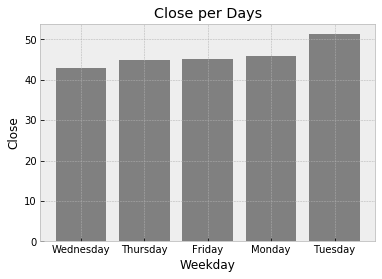

In [43]:
import matplotlib.pyplot as plt
x = ['Weekday']
Y = ['Close']

plt.bar(df_2['Weekday'], df_2['Close'], color= 'grey')
plt.title('Close per Days')
plt.xlabel('Weekday')
plt.ylabel('Close')
plt.show()

##Scatter Plot

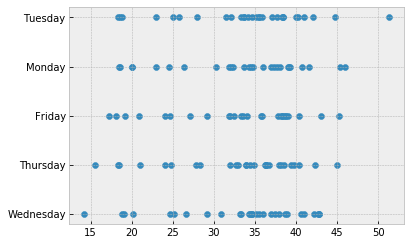

In [44]:
plt.scatter(df_2['Close'], df_2['Weekday'])

##Profile Report

In [46]:
from pandas_profiling import ProfileReport
Report = ProfileReport(df_2, minimal=True).to_notebook_iframe()
Report

Summarize dataset:   0%|          | 0/17 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [47]:
from sklearn.ensemble import RandomForestRegressor
X_train_d = X_train.fillna(0)
oe = OrdinalEncoder()

X_train_T = oe.fit_transform(X_train_d)
predictor = RandomForestRegressor()
predictor.fit(X_train_T, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

##PDP Box

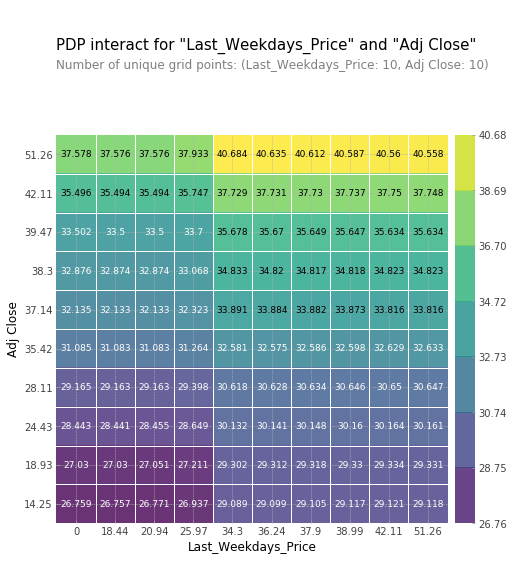

In [68]:
#PDP Box Plot
from pdpbox.pdp import pdp_interact_plot, pdp_interact


features = ['Last_Weekdays_Price', 'Adj Close']

interact = pdp_interact(
    model= predictor,
    dataset=X_train_T,
    model_features=X_train_T.columns,
    features=features)


pdp_interact_plot(interact, plot_type = 'grid', feature_names=features);

## Shap Plot

In [50]:

import shap
observation = X_test.iloc[[27]]
observation_T = oe.transform(observation)

In [51]:
predictor.predict(observation_T)

array([33.88129845])

In [52]:
predictor

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [53]:
import shap
observation = X_test.iloc[[27]]
observation_T = oe.transform(observation)

explain = shap.TreeExplainer(predictor)
values = explain.shap_values(observation_T)

shap.initjs()
shap.force_plot(
    base_value = explain.expected_value, 
    shap_values = values, 
    features = observation_T
)

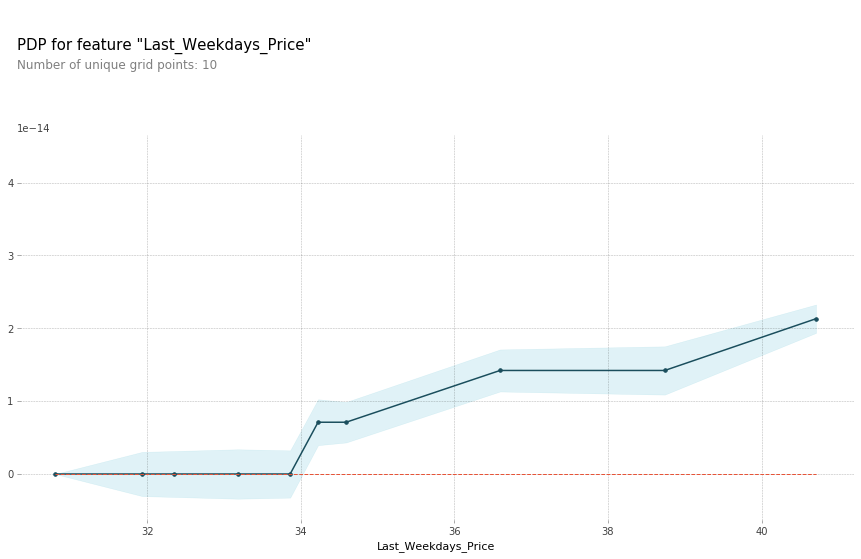

In [76]:
from pdpbox.pdp import pdp_isolate, pdp_plot
pdp_features= 'Last_Weekdays_Price'

isolated = pdp_isolate(
    model= model_lr,
    dataset=X_test,
    model_features=X_test.columns,
    feature=pdp_features
)

pdp_plot(isolated, feature_name=pdp_features);


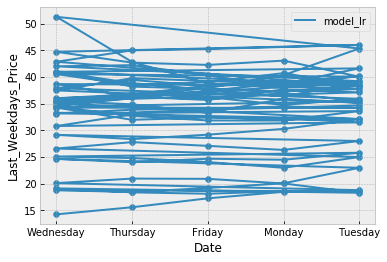

In [78]:
import matplotlib.pyplot as plt

# YOUR CODE HERE
y = df_2['Last_Weekdays_Price']
x = df_2['Weekday']
#plt.plot(x, y, label='Baseline', color='grey')

plt.scatter(x, y)
plt.plot(x, y, label='model_lr')
plt.xlabel('Date')
plt.ylabel('Last_Weekdays_Price')
plt.legend()

##Predicting Future Day

In [56]:
days = 14
idx = len(df_2)
week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
last_weekday_idx = week.index(df_2.iloc[idx-1]['Weekday'])
print(last_weekday_idx)
weekday_idx = last_weekday_idx
for day in range(days):
  print(idx + day -5, len(df_2))
  last_weekday_price = df_2.iloc[idx + day -5]['Close']
  weekday_idx += 1
  weekday_idx %= 5
  weekday = week[weekday_idx]
  print(weekday)
  data = {'Last_Weekdays_Price': last_weekday_price, 'Weekday': weekday}
  close = model_lr.predict([data])[0]
  print(close, last_weekday_price, weekday)

1
134 139
Wednesday


ValueError: ignored

## Model LR Prediction

In [79]:
# Show the model tree prediction

from random import random


prediction = (model_lr.predict(X_test))
# Show the model linear Regression prediction
#lr_prediction = lr.predict(x_future)
print(prediction)

[38.349998 38.66     36.310001 35.84     36.950001 35.450001 34.41
 32.700001 31.84     31.83     33.599998 33.139999 33.860001 34.080002
 34.450001 34.18     34.25     31.959999 32.400002 32.290001 31.48
 30.799999 32.959999 31.969999 32.099998 33.259998 33.290001 33.869999
 34.23     34.66     34.580002 34.43     33.52     33.669998 33.66    ]


In [93]:
df_2.tail(10)

,Open,High,Low,Close,Adj Close,Volume,Weekday,Last_Weekdays_Price
Date,,,,,,,,
2021-03-30,32.000000,33.369999,31.320000,33.259998,33.259998,1425300,Tuesday,31.480000
2021-03-31,33.459999,34.180000,32.709999,33.290001,33.290001,1088200,Wednesday,30.799999
2021-04-01,33.770000,34.990002,33.560001,33.869999,33.869999,1442300,Thursday,32.959999
2021-04-05,34.500000,34.806000,33.590000,34.230000,34.230000,781500,Monday,31.969999
2021-04-06,34.369999,35.860001,34.261002,34.660000,34.660000,907300,Tuesday,32.099998
2021-04-07,34.500000,35.270000,34.000000,34.580002,34.580002,636200,Wednesday,33.259998
2021-04-08,34.580002,34.900002,33.599998,34.430000,34.430000,588500,Thursday,33.290001
2021-04-09,34.099998,34.340000,33.209999,33.520000,33.520000,826600,Friday,33.869999
2021-04-12,33.709999,34.060001,33.029999,33.669998,33.669998,656200,Monday,34.230000


##Score

In [94]:
model_tree_r2_score = model_lr.score(X_train, y_train)
model_lr_r2_score = model_r.score(X_train, y_train)
print(model_tree_r2_score)
print(model_lr_r2_score)

1.0
1.0


#Visualize Data

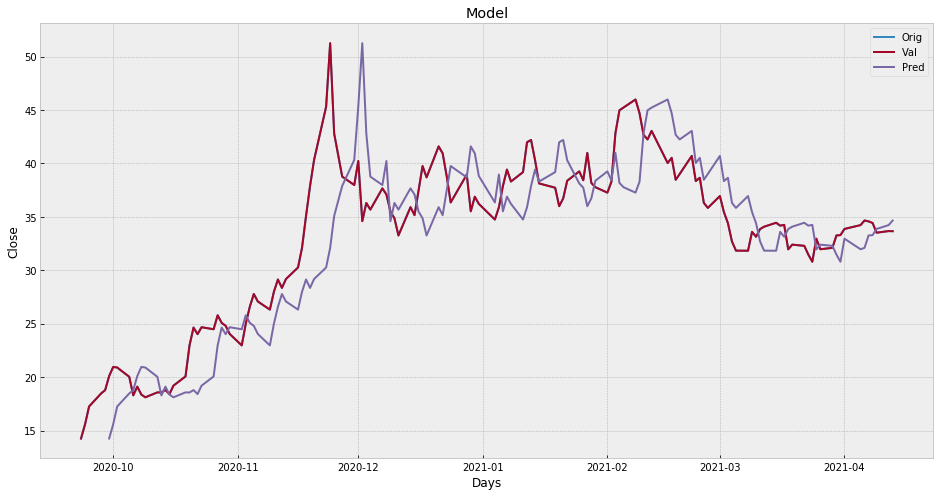

In [92]:
# Visualize data
prediction = model_lr


plt.figure(figsize = (16, 8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close')
plt.plot(df_2['Close'])
plt.plot(df_2[['Close', 'Last_Weekdays_Price']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()